In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.stats.anova import anova_lm

In [2]:
tradebalance = pd.read_csv("/Users/user/Desktop/Yonsei/Junior/3-2/Introduction to Data Analysis and Regression/Final Project/TradeBalance.csv")

In [3]:
tradebalance.head()

,Trade Balance(1000$),China,US,Japan,Vietnam,India,Russia,SaudiArabia,UAE,Qatar,Total
0,2000.01,227050,392763,-805509,81895,52839,-62325,-748216,-145078,-126400,-432198
1,2000.02,438827,312790,-911246,91505,82316,-74880,-662459,-191343,-160429,652390
2,2000.03,312029,339441,-1152135,124391,58390,-71713,-675218,-234547,-106339,217692
3,2000.04,334514,127872,-1232187,141913,8886,-81450,-611873,-197884,-172621,177508
4,2000.05,596630,532939,-956602,139920,23858,-99159,-602939,-110824,-155429,1353399


In [4]:
trade_lm = smf.ols(formula='Total~China+US+Japan+Vietnam+India+Russia+SaudiArabia+UAE+Qatar', data=tradebalance).fit()

In [5]:
trade_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     123.0
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           1.80e-89
Time:                        14:58:24   Log-Likelihood:                -4296.1
No. Observations:                 276   AIC:                             8612.
Df Residuals:                     266   BIC:                             8648.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.071e+05   3.47e+05      2.038      0.043     2.4e+04    1.39e+06
China           1.5524      0.081     19.151      0.000       1.393       1.712
US              1.0220      0.160      6.369      0.000       0.706       1.338
Japan          -0.1650      0.192     -0.858      0.391      -0.543       0.213
Vietnam         0.3907      0.182      2.151      0.032       0.033       0.748
India           1.9270      0.542      3.555      0.000       0.860       2.994
Russia          1.3916      0.377      3.693      0.000       0.650       2.134
SaudiArabia     1.5659      0.228      6.878      0.000       1.118       2.014
UAE             1.3892      0.375      3.705      0.000       0.651       2.127
Qatar           1.3229      0.278      4.756      0.000       0.775       1.870
==============================================================================
Omnibus:                       43.666   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.596
Skew:                           0.744   Prob(JB):                     7.13e-24
Kurtosis:                       5.656   Cond. No.                     1.78e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
trade_lm_improve = smf.ols(formula='Total~China+US+Vietnam+India+Russia+SaudiArabia+UAE+Qatar', data=tradebalance).fit()

In [7]:
trade_lm_improve.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     138.5
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           2.13e-90
Time:                        14:58:24   Log-Likelihood:                -4296.5
No. Observations:                 276   AIC:                             8611.
Df Residuals:                     267   BIC:                             8644.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.173e+05   2.46e+05      3.734      0.000    4.34e+05     1.4e+06
China           1.5810      0.074     21.415      0.000       1.436       1.726
US              1.0099      0.160      6.322      0.000       0.695       1.324
Vietnam         0.4010      0.181      2.213      0.028       0.044       0.758
India           1.9900      0.537      3.707      0.000       0.933       3.047
Russia          1.4786      0.363      4.076      0.000       0.764       2.193
SaudiArabia     1.5031      0.216      6.975      0.000       1.079       1.927
UAE             1.3579      0.373      3.641      0.000       0.624       2.092
Qatar           1.3990      0.263      5.309      0.000       0.880       1.918
==============================================================================
Omnibus:                       45.842   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.338
Skew:                           0.773   Prob(JB):                     1.49e-25
Kurtosis:                       5.748   Cond. No.                     1.13e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
anova_lm(trade_lm_improve, trade_lm)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,267.0,5.368631e+14,0.0,NaN,NaN,NaN
1,266.0,5.353797e+14,1.0,1.483390e+12,0.737013,0.391392


Thus, we can't reject the null, so that we had better use the removed model.

In [9]:
index = np.arange(0, 276, 12)

In [10]:
label = np.arange(2000, 2023)

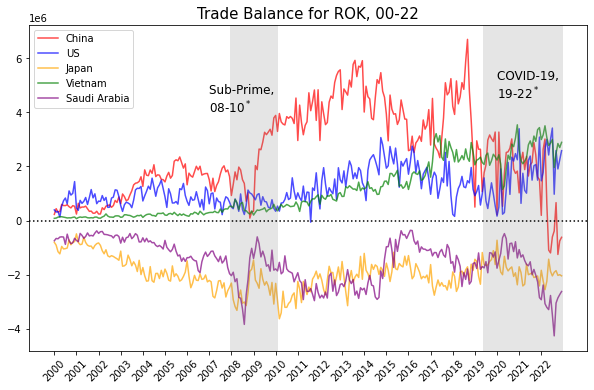

In [11]:
plt.figure(figsize=(10,6))
plt.plot(tradebalance['China'], color='red', alpha=0.7, label='China')
plt.plot(tradebalance['US'], color='blue', alpha=0.7, label='US')
plt.plot(tradebalance['Japan'], color='orange', alpha=0.7, label='Japan')
plt.plot(tradebalance['Vietnam'], color='green', alpha=0.7, label='Vietnam')
plt.plot(tradebalance['SaudiArabia'], color='purple', alpha=0.7, label='Saudi Arabia')
plt.xticks(index, label, rotation = 45)
plt.legend(loc='upper left')
plt.axvline(108, color='grey', alpha=0.2, linestyle='-', linewidth=48)
plt.axvline(254, color='grey', alpha=0.2, linestyle='-', linewidth=80)
plt.axhline(0, color='black', linestyle=':')
plt.annotate('Sub-Prime, \n08-10$^*$', xy=(84,-2), xytext=(84,4000000), fontsize=12, color='black')
plt.annotate('COVID-19, \n19-22$^*$', xy=(252,-2), xytext=(240,4500000), fontsize=12, color='black')
plt.title("Trade Balance for ROK, 00-22", fontsize=15)
plt.show()